In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving Fish.csv to Fish.csv


In [2]:
import pandas as pd
df = pd.read_csv(filename, error_bad_lines=False)
df.head(2)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.48,4.3056


In [4]:
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [9]:
X = df.iloc[:, 1:]
y = df.loc[:, 'Species']

In [12]:
from sklearn.preprocessing import MinMaxScaler #단위를 0~1 사이의 값으로 통일하는거 여러가지 종류가 있으니 맞게 써야함

scaler = MinMaxScaler()
scaler.fit(x)
X_scaled = scaler.transform(X)

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y= label_encoder.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("Accturacy :{:.2f}%".format(accuracy *100) )

Accturacy :81.25%


Text(0.5, 1.0, 'Confusion Matrix')

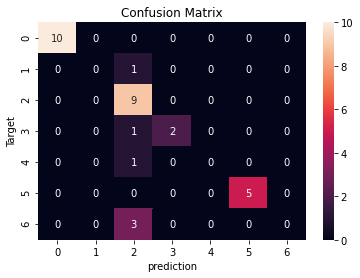

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')